In [362]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [363]:
df=pd.read_csv("multiple_linear_regression.csv")

In [364]:
df.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Feature 3  200 non-null    float64
 3   Target     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [366]:
df.describe()

,Feature 1,Feature 2,Feature 3,Target
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [367]:
df.dtypes

Feature 1    float64
Feature 2    float64
Feature 3    float64
Target       float64
dtype: object

In [368]:
mlk=np.random.rand(len(df))<0.8
train=df[mlk]
test=df[~mlk]

In [369]:
train

,Feature 1,Feature 2,Feature 3,Target
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [370]:
x_train=train.iloc[:,train.columns!="Target"]
y_train=train[["Target"]]
x_test=test.iloc[:,test.columns!="Target"]
y_test=test[["Target"]]

In [371]:
df.shape

(200, 4)

In [372]:
len(df)

200

In [373]:
len(x_train)

154

In [374]:
len(y_test)

46

In [375]:
x_train=np.array(x_train)

In [376]:
x_train

array([[ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [214.7,  24. ,   4. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [292.9,  28.3,  43.2],
       [ 97.2,   1.5,  30. ],
       [265.6,  20. ,   0.3],
       [ 95.7,   1.4,   7.4],
       [290.7,   4.1,   8.5],
       [266.9,  43.8,   5. ],
       [ 74.7,  49.4,  45.7],
       [ 43.1,  26.7,  35.1],
       [228. ,  37.7,  32. ],
       [202.5,  22.3,  31.6],
       [177. ,  33.4,  38.7],
       [293.6,  27.7,   1.8],
       [206.9,   8.4,  26.4],
       [ 2

In [377]:
y_train=np.array(y_train)

In [378]:
y_train

array([[10.4],
       [ 9.3],
       [18.5],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [17.4],
       [22.4],
       [12.5],
       [24.4],
       [14.6],
       [18. ],
       [12.5],
       [ 5.6],
       [15.5],
       [ 9.7],
       [12. ],
       [15. ],
       [15.9],
       [21.4],
       [ 9.6],
       [17.4],
       [ 9.5],
       [12.8],
       [25.4],
       [14.7],
       [10.1],
       [21.5],
       [16.6],
       [17.1],
       [20.7],
       [12.9],
       [ 8.5],
       [14.9],
       [10.6],
       [14.8],
       [11.4],
       [10.7],
       [22.6],
       [21.2],
       [20.2],
       [23.7],
       [ 5.5],
       [18.4],
       [ 8.1],
       [24.2],
       [15.7],
       [14. ],
       [ 9.3],
       [ 9.5],
       [18.9],
       [22.3],
       [18.3],
       [12.4],
       [ 8.8],
       [11. ],
       [17. ],
       [ 8.7],
       [ 6.9],
       [14.2],
       [ 5.3],
       [11.8],
       [12.3],
       [11.3],
       [13.6],
       [12

In [379]:
b=0
w_list=[0,0,0]
w=np.array(w_list)

In [380]:
w_parameter

array([0, 0, 0])

In [381]:
x_train.shape

(154, 3)

In [382]:
def predictions(w,x_train,b):
    y_hat=np.zeros(len(x_train))
    for i in range(x_train.shape[0]):
        x_vec=x_train[i,:]
        y_hat[i]=np.dot(w,x_vec)+b
    return y_hat

In [383]:
def cost_function(x_train,y_train,w,b):
    y_hat=predictions(w,x_train,b)
    cost=0
    for i in range(len(x_train)):
        cost=cost+(y_hat[i]-y_train[i])**2
    cost=cost*(x_train.shape[0]*0.5)
    return cost

In [384]:
x_train[0]

array([44.5, 39.3, 45.1])

In [385]:
w

array([0, 0, 0])

In [386]:
def compute_gradientdescent(w,b,x_train,y_train):
    m,n=x_train.shape
    dj_dw=np.zeros((n,))
    dj_db=0.
    for i in range(m):
        err=(np.dot(x_train[i],w)+b)-y_train[i]
        for j in range(n):
            dj_dw[j]=dj_dw[j]+err*x_train[i,j]
        dj_db=dj_db+err
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    return dj_dw,dj_db
    

In [387]:
def gradient_descent(w_in,b_in,alpha,iterations,x_train,y_train,cost_function,compute_gradientdescent):
    j_history=[]
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    for i in range(iterations):
        
        dj_dw,dj_db=compute_gradientdescent(w,b,x_train,y_train)
        
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        cost=cost_function(x_train,y_train,w,b)
        
        j_history.append(cost)
    return w,b,j_history
        
        

In [388]:
w,b,j_history=gradient_descent(w,b,0.00003,500,x_train,y_train,cost_function,compute_gradientdescent)

In [389]:
w

array([0.05354085, 0.217445  , 0.02026508])

In [390]:
b

array([0.00930125])

In [391]:
for j in range(len(j_history)):
    if j%10==0:
        print(j_history[j])


[251052.20528198]
[183914.19537174]
[148862.1374338]
[125692.90697215]
[109893.97206367]
[98724.21142217]
[90512.38634972]
[84234.07168965]
[79256.45166163]
[75184.31715837]
[71767.08075751]
[68842.58666295]
[66303.11352332]
[64074.76718735]
[62104.95604973]
[60354.74876281]
[58794.18428926]
[57399.36999904]
[56150.66515907]
[55031.52551049]
[54027.75248291]
[53126.99184095]
[52318.38764897]
[51592.33431982]
[50940.29179479]
[50354.64237817]
[49828.57591454]
[49355.99495533]
[48931.43458395]
[48549.99342014]
[48207.27346801]
[47899.32718537]
[47622.61060398]
[47373.94162221]
[47150.46278539]
[46949.60800143]
[46769.07273357]
[46606.78728145]
[46460.8928152]
[46329.71986944]
[46211.76903919]
[46105.69364884]
[46010.28419041]
[45924.45434929]
[45847.22845478]
[45777.73020971]
[45715.17256844]
[45658.84864618]
[45608.12355436]
[45562.42706765]


In [392]:
x_test=np.array(x_test)


In [393]:
test_predictions=predictions(w,x_test,b)

In [394]:
y_test=np.array(y_test)

In [395]:
for i in range(len(x_test)):
    print(f"Predict={test_predictions[i]},actual={y_test[i]}")

Predict=21.95081462833782,actual=[22.1]
Predict=13.221373027657089,actual=[12.9]
Predict=11.70173898466645,actual=[10.6]
Predict=5.299947171332066,actual=[8.6]
Predict=10.251361892039686,actual=[9.2]
Predict=7.028024305069944,actual=[9.7]
Predict=19.02312220130066,actual=[19.]
Predict=8.542801303790085,actual=[11.3]
Predict=19.687093570604272,actual=[18.9]
Predict=8.095220366582787,actual=[10.5]
Predict=10.619837954581268,actual=[11.9]
Predict=22.252621680389613,actual=[23.2]
Predict=6.881045402262405,actual=[9.7]
Predict=11.812908820674405,actual=[13.2]
Predict=22.844977178128925,actual=[23.8]
Predict=16.920813041838144,actual=[18.]
Predict=10.827197406201773,actual=[13.4]
Predict=8.362489278400137,actual=[11.]
Predict=21.475366633783235,actual=[21.7]
Predict=15.68579662584586,actual=[15.2]
Predict=20.145190788706177,actual=[19.4]
Predict=22.844607476769653,actual=[22.2]
Predict=1.3164504668533876,actual=[5.3]
Predict=15.026850422945271,actual=[13.4]
Predict=12.813717036741672,actual=

In [396]:
j_history[100:]

[array([71767.08075751]),
 array([71454.57750799]),
 array([71146.83223576]),
 array([70843.72398021]),
 array([70545.13653478]),
 array([70250.9582253]),
 array([69961.08169912]),
 array([69675.40372448]),
 array([69393.8249997]),
 array([69116.24997164]),
 array([68842.58666295]),
 array([68572.74650776]),
 array([68306.64419533]),
 array([68044.19752132]),
 array([67785.32724622]),
 array([67529.95696068]),
 array([67278.01295736]),
 array([67029.42410897]),
 array([66784.12175225]),
 array([66542.03957746]),
 array([66303.11352332]),
 array([66067.28167695]),
 array([65834.48417865]),
 array([65604.66313126]),
 array([65377.76251388]),
 array([65153.72809976]),
 array([64932.50737807]),
 array([64714.04947952]),
 array([64498.30510542]),
 array([64285.22646025]),
 array([64074.76718735]),
 array([63866.88230778]),
 array([63661.528162]),
 array([63458.66235436]),
 array([63258.24370027]),
 array([63060.23217582]),
 array([62864.58886976]),
 array([62671.27593789]),
 array([62480.25

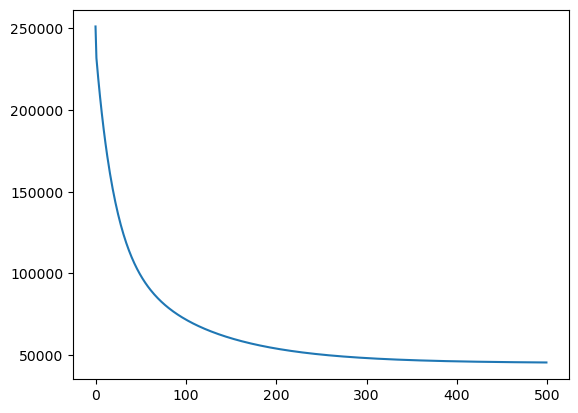

In [398]:
plt.plot(j_history)

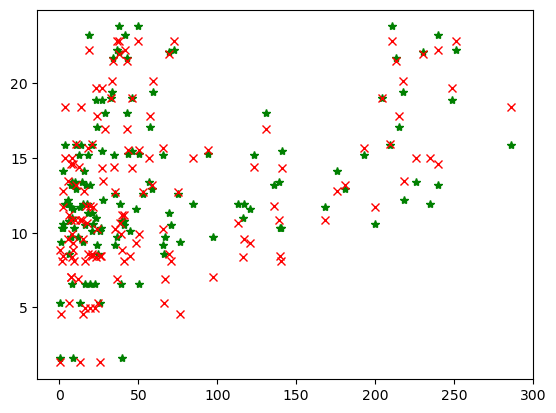

In [402]:
plt.plot(x_test,y_test,"*",color="green")
plt.plot(x_test,test_predictions,"x",color="red")

In [412]:
accuracy=100-np.mean(np.absolute(test_predictions-y_test))

In [413]:
accuracy

94.28850886886428